In [2]:
import numpy as np

Define the PCA function

In [3]:
def pca(X, num_components):
    # Calculate the mean of the data
    mean_X = np.mean(X, axis=0)

    # Center the data
    X_centered = X - mean_X

    # Calculate the covariance matrix of the data
    cov_X = np.cov(X_centered, rowvar=False)

    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov_X)

    # Sort the eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top k eigenvectors
    top_eigenvectors = sorted_eigenvectors[:, :num_components]

    # Transform the data to the new space
    X_transformed = np.dot(X_centered, top_eigenvectors)
    return X_transformed, top_eigenvectors

Load the iris dataset

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

Apply PCA to the data

In [5]:
X_transformed, top_eigenvectors = pca(X, num_components=2)

Plot the transformed data

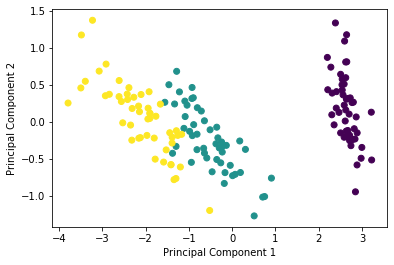

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=iris.target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()